Google Colab: https://colab.research.google.com/drive/1e46u6nUMHqtDklOyrgK7f4SyBzY8eLXL#scrollTo=Q2PshVrB6Cj5

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### 1.	Defining problem statement, importing the data and data structure analysis

Delivery Time Estimation for Porter Porter, India’s largest marketplace for intra-city logistics, aims to improve the lives of its 150,000+ driver-partners by providing consistent earnings and independence.

The company has serviced over 5 million customers and collaborates with various restaurants for direct food delivery. To enhance customer experience, Porter wants to estimate delivery times accurately. The goal is to develop a regression model that predicts delivery times based on factors such as the type of food ordered, the restaurant’s location, and available delivery partners.

Column Profiling:

1. market_id : integer id for the market where the restaurant lies
2. created_at : the timestamp at which the order was placed
3. actual_delivery_time : the timestamp when the order was delivered
4. store_primary_category : category for the restaurant
5. order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
6. total_items subtotal : final price of the order
7. num_distinct_items : the number of distinct items in the order
8. min_item_price : price of the cheapest item in the order
9. max_item_price : price of the costliest item in order
10. total_onshift_partners : number of delivery partners on duty at the time order was placed
11. total_busy_partners : number of delivery partners attending to other tasks
12. total_outstanding_orders : total number of orders to be fulfilled at the moment

In [4]:
url = 'https://raw.githubusercontent.com/satheeshML123/Porter_Business_Case/main/dataset.csv'
df = pd.read_csv(url)

In [5]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [6]:
df['store_primary_category'].unique()

array(['american', 'mexican', nan, 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british',
       'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

In [7]:
df.shape

(197428, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,196441.0,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0
order_protocol,196433.0,2.882352,1.503771,1.0,1.0,3.0,4.0,7.0
total_items,197428.0,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0
subtotal,197428.0,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
num_distinct_items,197428.0,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0
min_item_price,197428.0,686.218470,522.038648,-86.0,299.0,595.0,949.0,14700.0
max_item_price,197428.0,1159.588630,558.411377,0.0,800.0,1095.0,1395.0,14700.0
total_onshift_partners,181166.0,44.808093,34.526783,-4.0,17.0,37.0,65.0,171.0
total_busy_partners,181166.0,41.739747,32.145733,-5.0,15.0,34.0,62.0,154.0
total_outstanding_orders,181166.0,58.050065,52.661830,-6.0,17.0,41.0,85.0,285.0


In [10]:
df.describe(include=object).T

,count,unique,top,freq
created_at,197428,180985,2015-02-11 19:50:43,6
actual_delivery_time,197421,178110,2015-02-11 20:40:45,5
store_id,197428,6743,d43ab110ab2489d6b9b2caa394bf920f,937
store_primary_category,192668,74,american,19399


In [11]:
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [12]:
df.nunique()

market_id                        6
created_at                  180985
actual_delivery_time        178110
store_id                      6743
store_primary_category          74
order_protocol                   7
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         172
total_busy_partners            159
total_outstanding_orders       281
dtype: int64

### 2.	Data preprocessing

In [13]:
df['created_at']=pd.to_datetime(df['created_at'])

In [14]:
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [15]:
df['delivery_time_taken'] = df['actual_delivery_time']-df['created_at']

In [16]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:29:41
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:51:15
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:39:50


In [17]:
df['dtime_mins'] = pd.to_timedelta(df['delivery_time_taken'])/pd.Timedelta('60s')

In [18]:
df['hour'] = df['created_at'].dt.hour
df['day'] = df['created_at'].dt.dayofweek

In [19]:
#duplicate value:
df.duplicated().sum()

0

In [20]:
df.drop(columns=['created_at', 'actual_delivery_time', 'store_id', 'delivery_time_taken'], inplace=True)

In [21]:
cols = ['market_id', 'order_protocol', 'store_primary_category', 'hour', 'day'] #categorical_columns

for i in cols:
    print(f'{i}: {df[i].unique()}')

market_id: [ 1.  2.  3.  4. nan  5.  6.]
order_protocol: [ 1.  2.  3.  4. nan  5.  6.  7.]
store_primary_category: ['american' 'mexican' nan 'indian' 'italian' 'sandwich' 'thai' 'cafe'
 'salad' 'pizza' 'chinese' 'singaporean' 'burger' 'breakfast'
 'mediterranean' 'japanese' 'greek' 'catering' 'filipino'
 'convenience-store' 'other' 'korean' 'vegan' 'asian' 'barbecue' 'fast'
 'dessert' 'smoothie' 'seafood' 'vietnamese' 'cajun' 'steak'
 'middle-eastern' 'soup' 'vegetarian' 'persian' 'nepalese' 'sushi'
 'latin-american' 'hawaiian' 'chocolate' 'burmese' 'british' 'pasta'
 'alcohol' 'dim-sum' 'peruvian' 'turkish' 'malaysian' 'ethiopian' 'afghan'
 'bubble-tea' 'german' 'french' 'caribbean' 'gluten-free' 'comfort-food'
 'gastropub' 'pakistani' 'moroccan' 'spanish' 'southern' 'tapas' 'russian'
 'brazilian' 'european' 'cheese' 'african' 'argentine' 'kosher' 'irish'
 'lebanese' 'belgian' 'indonesian' 'alcohol-plus-food']
hour: [22 21 20  2  3  0  1 19  4 23  5 18  6 17 16 15 14  7  8]
day: [4 1 

### 3.	Handling null values

In [22]:
df.isnull().sum()/df.shape[0]*100

market_id                   0.499929
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
dtime_mins                  0.003546
hour                        0.000000
day                         0.000000
dtype: float64

In [23]:
#small amount of null values in dtime_mins
df.dropna(subset=['dtime_mins'], inplace=True)

In [24]:
for i in cols:
    m1 = df[i].mode()[0]
    df[i].fillna(m1, inplace=True)

In [25]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,dtime_mins,hour,day
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
2,3.0,american,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,20,3
3,3.0,american,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,21,1
4,3.0,american,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2,6


In [26]:
df.isnull().sum()

market_id                       0
store_primary_category          0
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtime_mins                      0
hour                            0
day                             0
dtype: int64

### 4.	Encoding categorical columns

In [27]:
# calculating mean for each categories
a = df.groupby('store_primary_category')['dtime_mins'].mean().to_dict()

In [28]:
#mapping mean with categorical column to perform target encoding
df['store_primary_category'] = df['store_primary_category'].map(a)

In [29]:
df['total_onshift_partners'] = df.groupby('market_id')['total_onshift_partners'].transform(lambda x: x.fillna(x.median()))
df['total_busy_partners'] = df.groupby('market_id')['total_busy_partners'].transform(lambda x: x.fillna(x.median()))
df['total_outstanding_orders'] = df.groupby('market_id')['total_outstanding_orders'].transform(lambda x: x.fillna(x.median()))

In [30]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,dtime_mins,hour,day
0,1.0,47.948328,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,44.546868,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
2,3.0,47.948328,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,20,3
3,3.0,47.948328,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,21,1
4,3.0,47.948328,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2,6


In [31]:
df.isna().sum()

market_id                   0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtime_mins                  0
hour                        0
day                         0
dtype: int64

### 5.	Data visualization and cleaning

<Axes: >

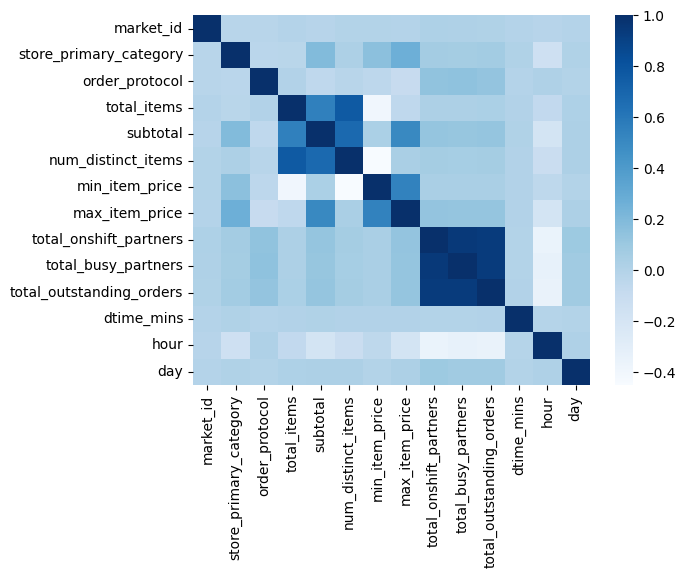

In [32]:
sns.heatmap(df.corr(), cmap = 'Blues')

<ipython-input-34-a816959df5d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x='market_id', order=df['market_id'].value_counts().index, palette='viridis')


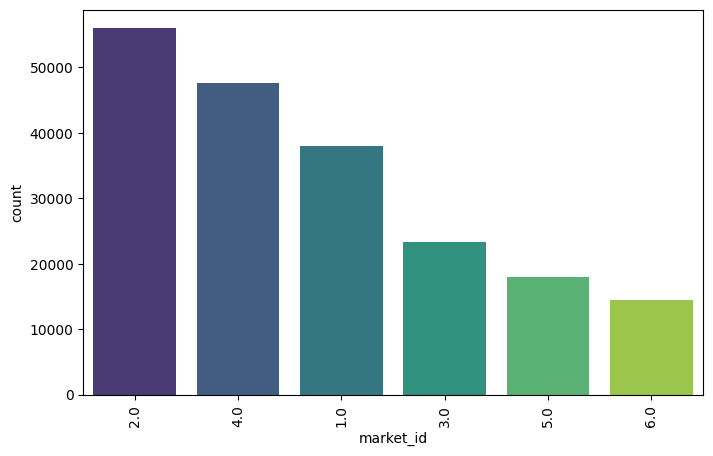

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data= df, x='market_id', order=df['market_id'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.show()

<ipython-input-35-be4b01936a73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x='day', order=df['day'].value_counts().index, palette='Spectral')


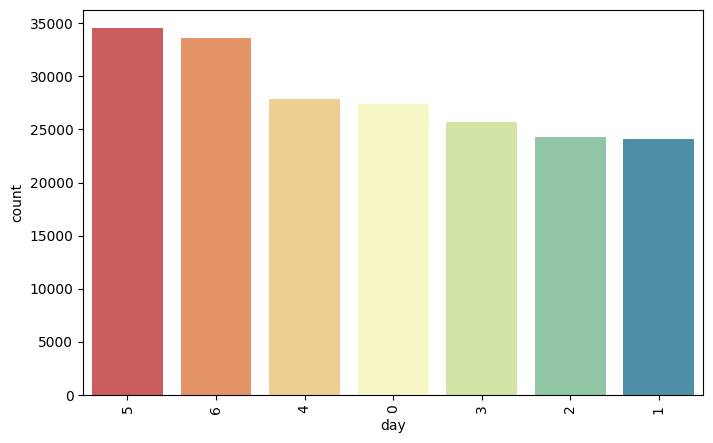

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(data= df, x='day', order=df['day'].value_counts().index, palette='Spectral')
plt.xticks(rotation=90)
plt.show()

In [36]:
df.describe()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,dtime_mins,hour,day
count,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000
mean,2.973807,48.470956,2.872871,3.196367,2682.326379,2.670780,686.224596,1159.590444,43.942919,41.031699,56.616535,48.470956,8.467362,3.218923
std,1.522628,4.817804,1.505892,2.666552,1823.106256,1.630261,522.044061,558.416236,33.274744,30.967751,50.762558,320.493482,8.658781,2.045759
min,1.000000,34.133333,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,1.683333,0.000000,0.000000
25%,2.000000,45.344728,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,18.000000,16.000000,18.000000,35.066667,2.000000,1.000000
50%,3.000000,47.948328,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,36.000000,35.000000,43.000000,44.333333,3.000000,3.000000
75%,4.000000,49.735514,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,62.000000,59.000000,80.000000,56.350000,19.000000,5.000000
max,6.000000,70.200889,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,141947.650000,23.000000,6.000000


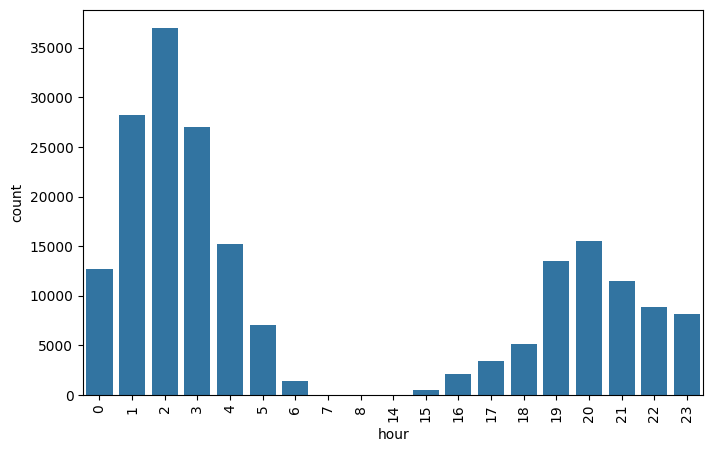

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(data= df, x='hour')
plt.xticks(rotation=90)
plt.show()

### Bi Variate Analysis:

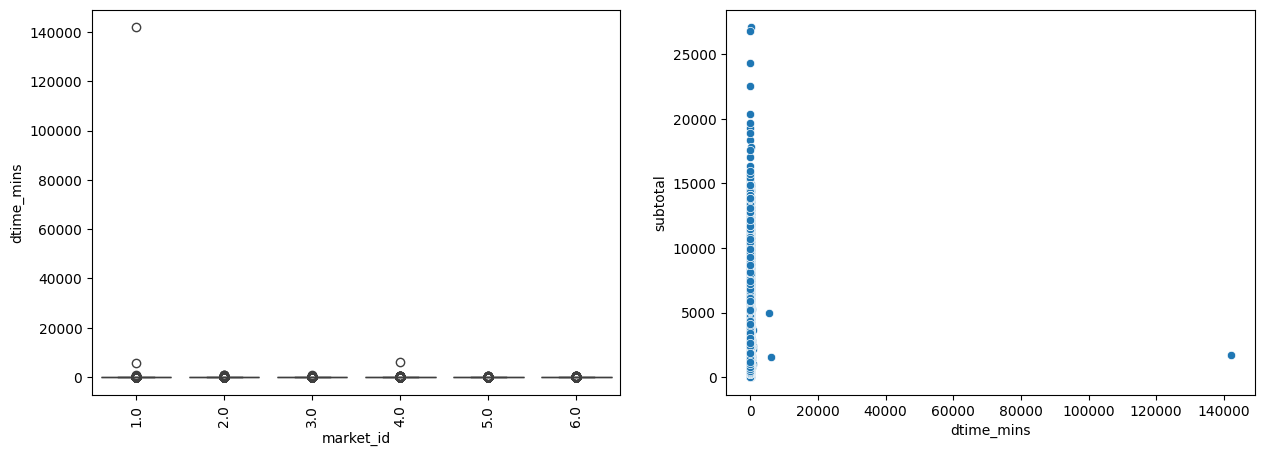

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data= df, x='market_id', y='dtime_mins')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='dtime_mins', y='subtotal')
plt.show()

### 6.	Check if the data contains outliers

In [39]:
# Removing outliers by any method
Q3 = df['dtime_mins'].quantile(0.75)
Q1 = df['dtime_mins'].quantile(0.25)

IQR = Q3-Q1
df = df[(df['dtime_mins']> (Q1-1.5*IQR)) & (df['dtime_mins']< (Q3+1.5*IQR))]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191143 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 191143 non-null  float64
 1   store_primary_category    191143 non-null  float64
 2   order_protocol            191143 non-null  float64
 3   total_items               191143 non-null  int64  
 4   subtotal                  191143 non-null  int64  
 5   num_distinct_items        191143 non-null  int64  
 6   min_item_price            191143 non-null  int64  
 7   max_item_price            191143 non-null  int64  
 8   total_onshift_partners    191143 non-null  float64
 9   total_busy_partners       191143 non-null  float64
 10  total_outstanding_orders  191143 non-null  float64
 11  dtime_mins                191143 non-null  float64
 12  hour                      191143 non-null  int32  
 13  day                       191143 non-null  int32 

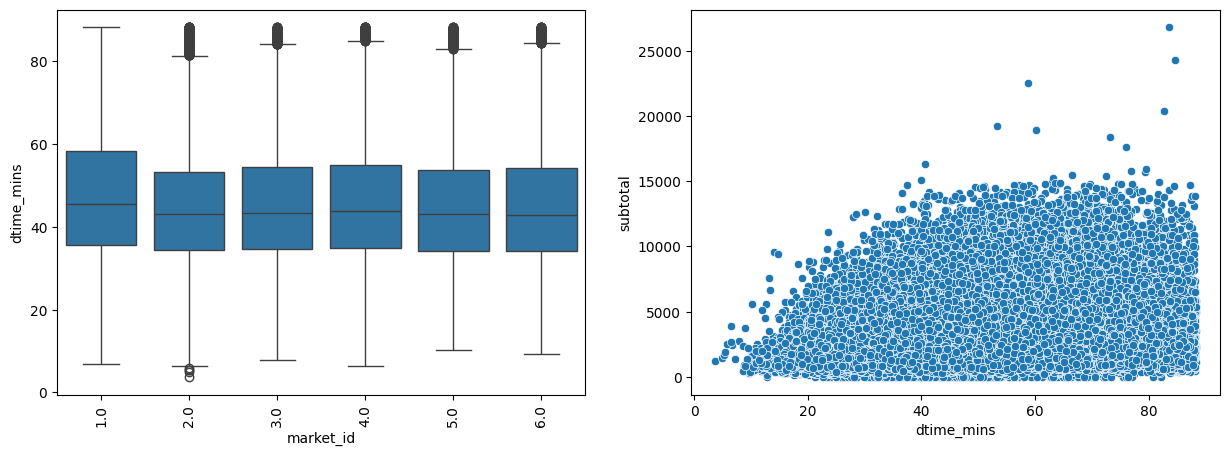

In [41]:
# Plotting the data again to see if anything has improved
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data= df, x='market_id', y='dtime_mins')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='dtime_mins', y='subtotal')
plt.show()

### 7.	Split the data in train and test

In [42]:
X=df.drop(columns=['dtime_mins'], axis=1)
y=df['dtime_mins']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Shape of x_train: {x_train.shape}, shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}, shape of y_test: {y_test.shape}" )

Shape of x_train: (152914, 13), shape of y_train: (152914,)
Shape of x_test: (38229, 13), shape of y_test: (38229,)


#### Random Forest:

In [43]:
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

RandomForestRegressor()

In [44]:
y_hat = reg.predict(x_test)
mse = mean_squared_error(y_test,y_hat)
rmse=mse**0.5
mae = mean_absolute_error(y_test,y_hat)
rf_r2_score=r2_score(y_test,y_hat)
print(f"Mean Squared Error: {mse}")
print(f"Relative Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r2_score: {rf_r2_score}")

Mean Squared Error: 161.80671980231958
Relative Mean Squared Error: 12.720327032050692
Mean Absolute Error: 10.07325098058124
r2_score: 0.2568995520065559


In [45]:
def mape(y_actual, y_predict):
    mape = np.mean(np.abs((y_actual-y_predict)/y_actual))
    return mape
print(f"Mean Absolute Percentage Error is: {mape(y_test,y_hat)}")

Mean Absolute Percentage Error is: 0.2472169347598486


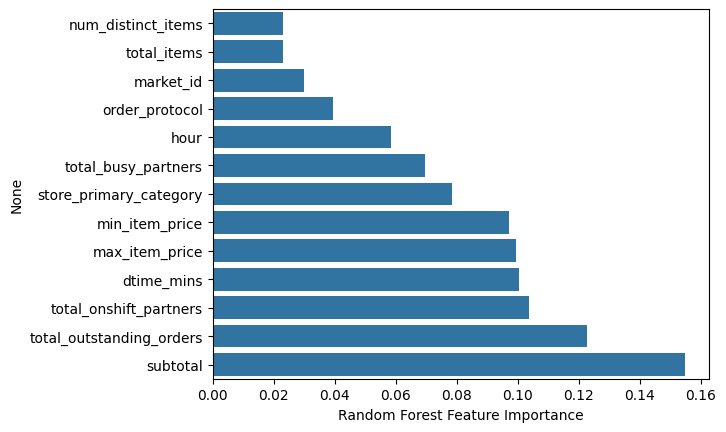

In [46]:
sort_idx=reg.feature_importances_.argsort()
sns.barplot(y=df.columns[sort_idx], x=reg.feature_importances_[sort_idx])
plt.xlabel('Random Forest Feature Importance')
plt.show()

### 8.	Scaling the data for neural networks.

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

### 9.	Creating a simple neural network

In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [49]:
model = Sequential(
    [
        Dense(64, activation='relu', kernel_initializer='normal', input_shape=(x_train.shape[1],)),
        Dense(516, activation='relu'),
        Dense(1024, activation='relu'),
        Dense(256, activation='relu'),
        Dense(1, activation='linear')
    ]
)

### 10.	Training the neural network for required amount of epochs

In [50]:
adam = Adam(learning_rate=0.01)
model.compile( loss='mse', optimizer=adam, metrics=['mse','mae'])

history = model.fit(x_train, y_train, epochs=30, batch_size=512, validation_split=0.2, verbose=1)

Epoch 1/30
239/239 [==============================] - 18s 71ms/step - loss: 472.6177 - mse: 472.6177 - mae: 15.3371 - val_loss: 186.6121 - val_mse: 186.6121 - val_mae: 10.8559
Epoch 2/30
239/239 [==============================] - 17s 71ms/step - loss: 180.7444 - mse: 180.7444 - mae: 10.6933 - val_loss: 189.2965 - val_mse: 189.2965 - val_mae: 11.3373
Epoch 3/30
239/239 [==============================] - 17s 73ms/step - loss: 177.8969 - mse: 177.8969 - mae: 10.6009 - val_loss: 176.2293 - val_mse: 176.2293 - val_mae: 10.7168
Epoch 4/30
239/239 [==============================] - 17s 73ms/step - loss: 176.0264 - mse: 176.0264 - mae: 10.5368 - val_loss: 175.4975 - val_mse: 175.4975 - val_mae: 10.6700
Epoch 5/30
239/239 [==============================] - 16s 68ms/step - loss: 176.2277 - mse: 176.2277 - mae: 10.5424 - val_loss: 172.7245 - val_mse: 172.7245 - val_mae: 10.3722
Epoch 6/30
239/239 [==============================] - 17s 70ms/step - loss: 174.9749 - mse: 174.9749 - mae: 10.4998 - va

### 11.	Plotting the losses and checking the accuracy of the model

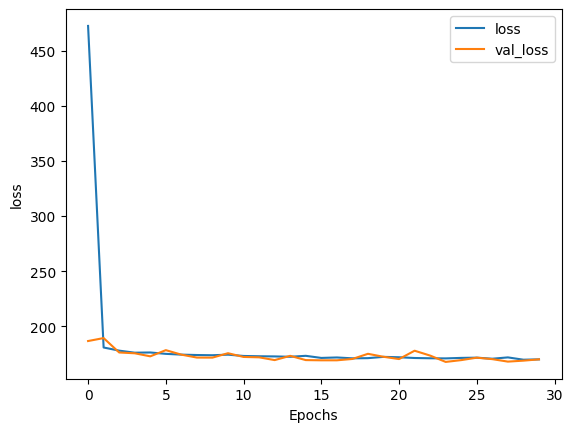

In [51]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()
plot_history(history, 'loss')

### Note: val loss is mostly below training loss so our model is not overfitting

### 12.	Checking its various metrics like MSE, RMSE, MAE

In [52]:
z = model.predict(x_test)

1195/1195 [==============================] - 7s 6ms/step


In [53]:
mse = mean_squared_error(y_test,z)
rmse=mse**0.5
mae = mean_absolute_error(y_test,z)
rf_r2_score=r2_score(y_test,z)
print(f"Mean Squared Error: {mse}")
print(f"Relative Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r2_score: {rf_r2_score}")

Mean Squared Error: 171.57319839678559
Relative Mean Squared Error: 13.098595283341858
Mean Absolute Error: 10.543561946783713
r2_score: 0.21204681271530412


## **Leading Questions:**
1.	Defining the problem statements and where can this and modifications of this be used?
  * Delivery Time Estimation for Porter Porter, India’s largest marketplace for intra-city logistics, aims to improve the lives of its 150,000+ driver-partners by providing consistent earnings and independence.

 * The company has serviced over 5 million customers and collaborates with various restaurants for direct food delivery. To enhance customer experience, Porter wants to estimate delivery times accurately. The goal is to develop a regression model that predicts delivery times based on factors such as the type of food ordered, the restaurant’s location, and available delivery partners.
2.	List 3 functions the pandas datetime provides with one line explanation.
  *   ***pd.to_datetime():***
Converts a column or an array of date-like strings into pandas datetime objects.
  *   ***dt accessor:***
Provides access to various datetime components (e.g., year, month, day, hour) for a pandas Series with datetime data.
  *   ***pd.date_range():***
Generates a range of dates based on specified start and end dates, with optional frequency (daily, monthly, etc.).
3.	Short note on datetime, timedelta, time span (period)
  *  ***Datetime*** refers to a specific point in time, including both date and time components.
  *   A ***timedelta*** represents a duration or difference between two datetime points.
  *   A ***time span*** (or period) represents a fixed duration, often used for frequency-based calculations.
4.	Why do we need to check for outliers in our data?
  *   Outliers can distort summary statistics such as the mean, median, and standard deviation.
  *   Outliers can adversely affect the performance of statistical models and machine learning algorithms.
  *   Many statistical tests assume that the data follows normal distribution. Outliers violate these assumptions and can lead to incorrect conclusions when performing hypothesis tests.
5.	Name 3 outlier removal methods?
  *   Z score method, IQR method and Trimming
6.	What classical machine learning methods can we use for this problem?
  * RandomForest
7.	Why is scaling required for neural networks?
  * scaling improves convergence, stability, and overall performance of NNs by making features comparable in magnitude.
8.	Briefly explain your choice of optimizer.
  * Adam:
    1. Updates the weights based on a random batch of the dataset.
    2. Uses both the Momentum and RMSprop techniques to reduce training time and variance.
    3. Removes biasness so to have a better moving average at the starting.
9.	Which activation function did you use and why?
  * The Rectified Linear Unit (ReLU) is a widely used activation function in neural networks.
  * To­ reduce p­ossibility ­of vanishing Gradient and faster c­onvergence.
10.	Why does a neural network perform well on a large dataset?
  * Neural networks thrive on large datasets because of their capacity for complexity, non-linearity, and feature extraction. The abundance of training examples enables them to learn meaningful representations and achieve impressive results.

